In [ ]:
import numpy as np
import argparse
import cv2
import os

In [13]:
original =  cv2.imread('C:\\Users\\cheon\\MasterData\\newTestSet\\mLForward\\sbnt220.png');
original

array([[[161, 157, 153],
        [161, 157, 153],
        [161, 157, 153],
        ...,
        [110, 118, 131],
        [108, 116, 129],
        [108, 116, 129]],

       [[160, 156, 152],
        [160, 156, 152],
        [160, 156, 152],
        ...,
        [107, 115, 128],
        [107, 115, 128],
        [107, 115, 128]],

       [[160, 155, 154],
        [160, 155, 154],
        [160, 155, 154],
        ...,
        [106, 114, 127],
        [107, 115, 128],
        [107, 115, 128]],

       ...,

       [[154, 152, 148],
        [154, 152, 148],
        [154, 152, 148],
        ...,
        [166, 164, 160],
        [166, 164, 160],
        [166, 164, 160]],

       [[154, 152, 148],
        [154, 152, 148],
        [154, 152, 148],
        ...,
        [166, 164, 160],
        [166, 164, 160],
        [166, 164, 160]],

       [[154, 152, 148],
        [154, 152, 148],
        [154, 152, 148],
        ...,
        [166, 164, 160],
        [166, 164, 160],
        [166, 164, 160]]

In [14]:
cv2.imshow('color image',original) 
cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)

-1

In [15]:
width = 512
height = 512
dim = (width, height)
 
# resize image
resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resized Dimensions :  (512, 512, 3)


In [16]:
# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'

#sa values
#lower = np.array([60, 50, 20], dtype = "uint8")
#upper = np.array([200, 255, 255], dtype = "uint8")

#sb values
#lower = np.array([90, 30, 20], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#sc values
#lower = np.array([30, 5,0], dtype = "uint8")
#upper = np.array([180, 255, 160], dtype = "uint8")

#sd values
#lower = np.array([20, 20, 100], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#se values
#lower = np.array([90, 70, 70], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

#sf values
#lower = np.array([60, 60, 60], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

In [7]:
converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
blur = cv2.blur(converted,(5,5))


    

In [ ]:
data = img_to_array(converted)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-20,20],height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)

In [17]:
skinMask = cv2.inRange(converted, lower, upper)
cv2.imshow('result', skinMask)
cv2.waitKey()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
skin = cv2.bitwise_and(resized, resized, mask = skinMask)
# show the skin in the image along with the mask
cv2.imshow("images", skinMask)

# show the skin in the image along with the mask
#cv2.imshow("Mask image", skinMask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [39]:
#Test (NOT WORKING) for further shadow removal by taking only larges contour
output = skin
contours, hierarchy = cv2.findContours(skinMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
blank_mask = np.zeros(output.shape, dtype=np.uint8)

if len(contours) != 0:
    # draw in blue the contours that were founded

    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    
    cv2.fillPoly(blank_mask, [c], (255,255,255))


# show the images
cv2.imshow("Result", blank_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [66]:
#Function to convert images to mask 
#Manually set lower and upper boundaries depending on the userclass
#No one size fit all method

import numpy as np
import argparse
import cv2
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


def massconvert(imageDir,filename,saveDir):
    original =  cv2.imread(imageDir);
    width = 512
    height = 512
    dim = (width, height)

    # resize image
    resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)

    # define the upper and lower boundaries of the HSV pixel
    # intensities to be considered 'skin'
    
    lower = np.array([30, 5,0], dtype = "uint8")
    upper = np.array([180, 255, 160], dtype = "uint8")


    converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
    
    #DATA AUGMENTATION LOOP
    data = img_to_array(converted)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(width_shift_range=[-40,40],height_shift_range=0.3)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(3):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        pyplot.imshow(image)
        skinMask = cv2.inRange(image, lower, upper)
        # apply a series of erosions and dilations to the mask
        # using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        skinMask = cv2.erode(skinMask, kernel, iterations = 3)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
        cv2.imwrite(saveDir + '\\AUGPR' + str(i) + filename , skinMask)
        #print(saveDir + '\\AUGPR' + filename)
        
        
    skinMask = cv2.inRange(converted, lower, upper)
    # apply a series of erosions and dilations to the mask
    # using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skinMask = cv2.erode(skinMask, kernel, iterations = 3)
    skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
    cv2.imwrite(saveDir + '\\PR' + str(i) + filename , skinMask)
    #print(saveDir + '\\PR' + filename)


In [67]:
#Function to loop through the subdirectory andd convert all images matching prefix(which indicatesa a certain user's feet type)

def conversionLoop(mainDir,subdirectory,prefix):
    saveDir = 'C:\\Users\Cheon\MasterData\\ktraining\\' + subdirectory
    print('Executing loop ' + subdirectory + ' PREFIX: ' + prefix)
    import os, re
    pfName = mainDir + subdirectory
    for i in os.listdir(pfName):
        #rint(os.path.join(pfName,i))
        if os.path.isfile(os.path.join(pfName,i)) and i.startswith(prefix):
            #print(pfName)
            massconvert(os.path.join(pfName,i),i,saveDir)
            #print(os.path.join(pfName,i))
   

Executing loop Close PREFIX: sc
Starting
Executing loop LForward PREFIX: sc
Starting
Executing loop LTurn PREFIX: sc
Starting
Executing loop Neutral PREFIX: sc
Starting
Executing loop PointIn PREFIX: sc
Starting
Executing loop PointOut PREFIX: sc
Starting
Executing loop RForward PREFIX: sc
Starting
Executing loop RTurn PREFIX: sc
Starting
operation Complete


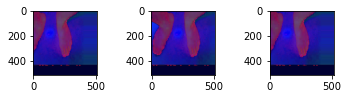

In [68]:
#Execute conversion loop in all subdirectories
dirList = ['Close','LForward','LTurn','Neutral','PointIn','PointOut','RForward','RTurn']
for i in dirList:
    conversionLoop('C:\\Users\Cheon\MasterData\\raws\\' ,i,'sd')
    print('Starting')
print('operation Complete')

In [ ]:
for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        print(subdirectory)

In [ ]:
#Test for auto skin thresholding using foot-at-center as example


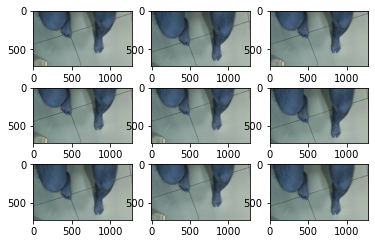

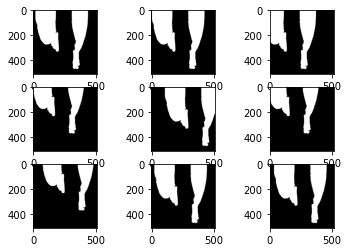

In [317]:
#Data augmentation Segment
#Model Training Segment
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = cv2.imread('C:\\Users\Cheon\MasterData\mLForward\PRsfn52.png');
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-50,50],height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [3]:
#Moddel training section begin
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
data_dir = "C:\\Users\Cheon\MasterData"
data_dir = pathlib.Path(data_dir)

NameError: name 'pathlib' is not defined

In [ ]:
from tqdm import tqdm
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import cv2
import numpy as np
import pandas as pd
classes = {'mClose':0,'mLForward':1,'mLTurn':2,'mNeutral':3,'mPointIn':4,'mPointOut':5,'mRForward':6,'mRTurn':7}
mClose_DIR='C:\\Users\Cheon\MasterData\mClose'
mLForward_DIR='C:\\Users\Cheon\MasterData\mLForward'
mLTurn_DIR ='C:\\Users\Cheon\MasterData\mLTurn'
nNeutral_DIR ='C:\\Users\Cheon\MasterData\mNeutral'
mPointIn_DIR ='C:\\Users\Cheon\MasterData\mPointIn'
mPointOut_DIR ='C:\\Users\Cheon\MasterData\mPointOut'
mRForward_DIR ='C:\\Users\Cheon\MasterData\mRForward'
mRTURN_DIR ='C:\\Users\Cheon\MasterData\mRTurn'


def assign_label(img,gest_type):
    return gest_type

X = []
y = []

def make_data(gest_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,gest_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path)
        X.append(np.array(img))
        y.append(str(label))

In [4]:
make_data(classes.get('mClose'), mClose_DIR)
make_data(classes.get('mLForward'), mLForward_DIR)
make_data(classes.get('mLTurn'), mLTurn_DIR)


100%|███████████████████████████████████████████████████████████████████████████████| 515/515 [00:03<00:00, 141.30it/s]


In [6]:
len(y)
y = np.array(y)
y.shape

(1858,)

In [14]:
len(X)
X = np.array(X)
X.shape

(1858,)

In [1]:
import splitfolders
import splitfolders
splitfolders.ratio('C:\\Users\Cheon\MasterData\ktraining', output="C:\\Users\Cheon\MasterData\ktraining", seed=1337, ratio=(.8,.2)) 

Copying files: 5151 files [00:07, 728.54 files/s]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
batch_size = 32
data_dir = 'C:\\Users\\Cheon\\MasterData\\ktraining\\train'
test_dir = 'C:\\Users\\Cheon\\MasterData\\ktraining\\test'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  batch_size=batch_size)

Found 4118 files belonging to 8 classes.
Using 2883 files for training.
Found 4118 files belonging to 8 classes.
Using 1235 files for validation.
Found 1033 files belonging to 8 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)



['mClose', 'mLForward', 'mLTurn', 'mNeutral', 'mPointIn', 'mPointOut', 'mRForward', 'mRTurn']


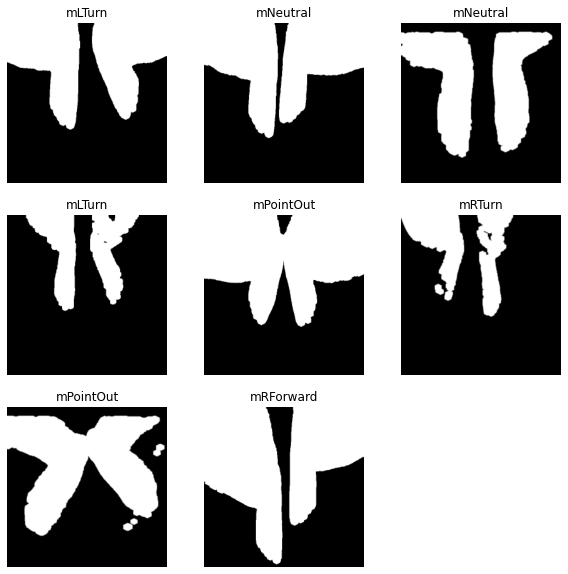

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [8]:
num_classes = len(class_names)
img_height = 256
img_width = 256

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [11]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
91/91 [==============================] - 54s 589ms/step - loss: 0.4448 - accuracy: 0.8602 - val_loss: 0.0758 - val_accuracy: 0.9846
Epoch 2/10
91/91 [==============================] - 51s 561ms/step - loss: 0.0509 - accuracy: 0.9823 - val_loss: 0.0392 - val_accuracy: 0.9911
Epoch 3/10
91/91 [==============================] - 50s 553ms/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.0408 - val_accuracy: 0.9911
Epoch 4/10
91/91 [==============================] - 50s 554ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0441 - val_accuracy: 0.9935
Epoch 5/10
91/91 [==============================] - 51s 555ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0407 - val_accuracy: 0.9943
Epoch 6/10
91/91 [==============================] - 50s 554ms/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 0.0441 - val_accuracy: 0.9935
Epoch 7/10
91/91 [==============================] - 50s 553ms/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 0.0456 - val_accuracy: 0.9919

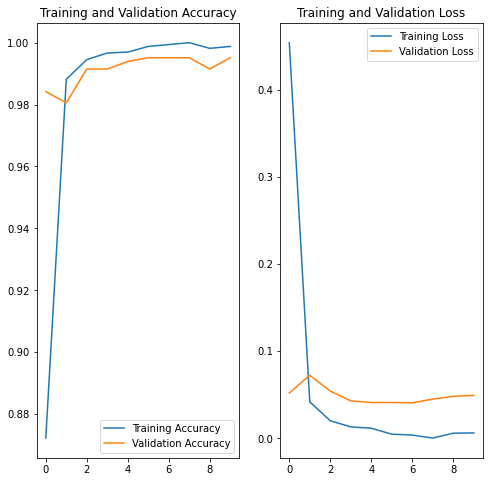

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
print("Evaluate on test data")
results = model.evaluate(test_ds, batch_size=32)
print("test loss, test acc:", results)


Evaluate on test data
33/33 [==============================] - 4s 120ms/step - loss: 0.1148 - accuracy: 0.9797
test loss, test acc: [0.11475174129009247, 0.9796708822250366]
